In [38]:
import os
from snn_delays.config import CHECKPOINT_PATH
from snn_delays.utils.model_loader import ModelLoader
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from snn_delays.utils.results_utils import get_results_refact, get_states, plot_losses

ckpt_dir = 'abl9_copy_taskT50'

sweep_params = {
    'delay_range': [(x, 1) for x in list(range(10, 55, 5))],
    'structure':[(8, 2, 'd'), (64, 2, 'd')]
    }

sweep_params_names = {
    'delay_range': ['drf'+str(x) for x in list(range(10, 55, 5))],
    'structure':['h8', 'h64']
    }

#### first run (f+d)
sweep_params2 = {
    'structure':[(8, 2, 'mf'), (64, 2, 'r'), (8, 2, 'r'), (64, 2, 'mf')]
    }

sweep_params_names2 = {
    'structure':['h8mf', 'h64r', 'h8r', 'h64mf']
    }



_, trnloss, _ = get_results_refact(ckpt_dir, sweep_params_names, rpts=2, mode='last')
_, trnloss2, _ = get_results_refact(ckpt_dir, sweep_params_names2, rpts=2, mode='last')

all_trnloss = trnloss | trnloss2


None


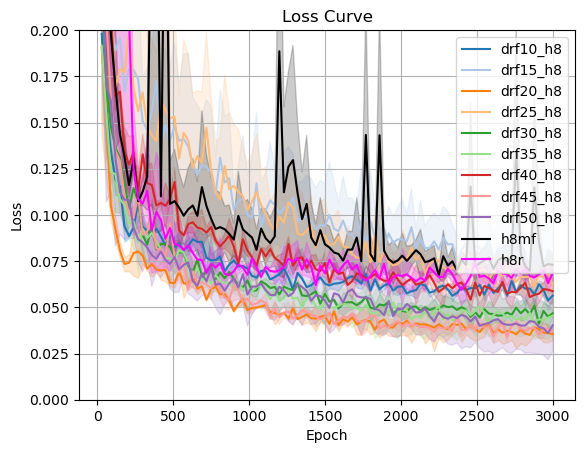

In [47]:
trnloss8 = {key:value for key, value in all_trnloss.items() if 'h8' in key}

colors = iter(plt.cm.tab20.colors)

for key, value in trnloss8.items():
    plt.title('Loss Curve')
    if key == 'h8mf':
        color = 'black'
    elif key == 'h8r':
        color = 'magenta'
    else:
        color = next(colors)
    plot_losses(value, label=key, color=color)
    plt.ylim(0,0.2)

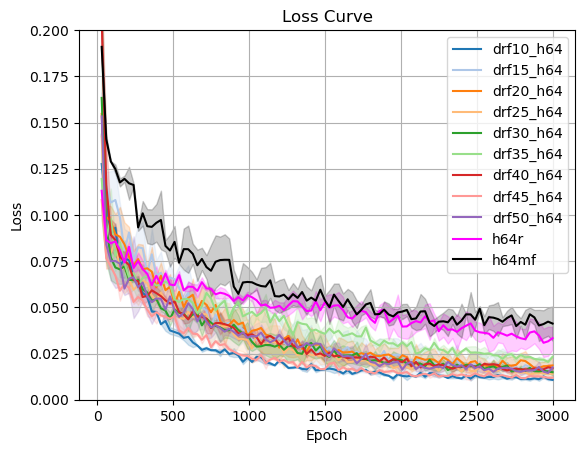

In [46]:
trnloss64 = {key:value for key, value in all_trnloss.items() if 'h64' in key}

colors = iter(plt.cm.tab20.colors)

for key, value in trnloss64.items():
    plt.title('Loss Curve')
    if key == 'h64mf':
        color = 'black'
    elif key == 'h64r':
        color = 'magenta'
    else:
        color = next(colors)
    plot_losses(value, label=key, color=color)
    plt.ylim(0,0.2)

In [14]:
trnl = {key:value[0] for key, value in trnloss.items()}
trnl

{'drf10_h8': [[29, 0.22339530289173126],
  [59, 0.18546253442764282],
  [89, 0.13655906915664673],
  [119, 0.11076553910970688],
  [149, 0.11087017506361008],
  [179, 0.08557670563459396],
  [209, 0.0876176655292511],
  [239, 0.09872366487979889],
  [269, 0.09724985063076019],
  [299, 0.0899902805685997],
  [329, 0.0906439945101738],
  [359, 0.08985131978988647],
  [389, 0.08166678994894028],
  [419, 0.09254609793424606],
  [449, 0.08547601848840714],
  [479, 0.08488547801971436],
  [509, 0.08747199177742004],
  [539, 0.09125685691833496],
  [569, 0.08457201719284058],
  [599, 0.08759544044733047],
  [629, 0.08902090042829514],
  [659, 0.0926198735833168],
  [689, 0.08993099629878998],
  [719, 0.09000833332538605],
  [749, 0.0786835253238678],
  [779, 0.08122716844081879],
  [809, 0.07176802307367325],
  [839, 0.06846218556165695],
  [869, 0.07535959780216217],
  [899, 0.07262106984853745],
  [929, 0.07034169882535934],
  [959, 0.07273305952548981],
  [989, 0.07040183246135712],
  [101

In [7]:
trnloss

{'drf3_h8': 2,
 'drf3_h64': 2,
 'drf5_h8': 2,
 'drf5_h64': 2,
 'drf10_h8': 2,
 'drf10_h64': 2,
 'drf15_h8': 2,
 'drf15_h64': 2,
 'drf20_h8': 2,
 'drf20_h64': 2,
 'drf25_h8': 2,
 'drf25_h64': 2,
 'drf30_h8': 2,
 'drf30_h64': 2,
 'drf35_h8': 2,
 'drf35_h64': 2,
 'drf40_h8': 2,
 'drf40_h64': 2,
 'drf45_h8': 2,
 'drf45_h64': 2,
 'drf50_h8': 2,
 'drf50_h64': 2}

In [27]:
from snn_delays.snn_refactored import SNN
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.utils.train_utils_refact_minimal import get_device

device = get_device()

time_window = 50
batch_size = 1000
dataset_size = batch_size

dataset = 'copymemory_episodic'

DL = DatasetLoader(dataset=dataset, caching='gpu', 
                   dataset_size = dataset_size,
                   num_workers=0, batch_size=batch_size, 
                   total_time=time_window)

_, test_loader, dataset_dict = DL.get_dataloaders()

attributes = ['spike_state']

spks, _, __ = get_states(ckpt_dir, sweep_params_names, attributes, rpts=1, loader = test_loader, batch_size=batch_size, device=device, mode='minloss')

returning dict_keys(['spike_state', 'refs', 'imgs'])


In [32]:
attributes = ['kwargs']

dee, _, __ = get_states(ckpt_dir, sweep_params_names, attributes, rpts=1, batch_size=batch_size, device=device, mode='minloss')

returning dict_keys(['kwargs', 'refs', 'imgs'])


In [36]:
dddd = {key:value[0]['extra_kwargs'] for key, value in dee.items()}
dddd

{'drf10_h8': {'debug': False, 'pruned_delays': 3, 'delay_range': (10, 1)},
 'drf10_h64': {'debug': False, 'pruned_delays': 3, 'delay_range': (10, 1)},
 'drf15_h8': {'debug': False, 'pruned_delays': 3, 'delay_range': (15, 1)},
 'drf15_h64': {'debug': False, 'pruned_delays': 3, 'delay_range': (15, 1)},
 'drf20_h8': {'debug': False, 'pruned_delays': 3, 'delay_range': (20, 1)},
 'drf20_h64': {'debug': False, 'pruned_delays': 3, 'delay_range': (20, 1)},
 'drf25_h8': {'debug': False, 'pruned_delays': 3, 'delay_range': (25, 1)},
 'drf25_h64': {'debug': False, 'pruned_delays': 3, 'delay_range': (25, 1)},
 'drf30_h8': {'debug': False, 'pruned_delays': 3, 'delay_range': (30, 1)},
 'drf30_h64': {'debug': False, 'pruned_delays': 3, 'delay_range': (30, 1)},
 'drf35_h8': {'debug': False, 'pruned_delays': 3, 'delay_range': (35, 1)},
 'drf35_h64': {'debug': False, 'pruned_delays': 3, 'delay_range': (35, 1)},
 'drf40_h8': {'debug': False, 'pruned_delays': 3, 'delay_range': (40, 1)},
 'drf40_h64': {'deb